In [53]:
%matplotlib inline
# 引入 numpy 和 pandas 模組
import numpy as np 
import pandas as pd
s1 = pd.Series([1, 3, 5, np.nan, 6, 8]) # 使用 Python lits 產生 Series，其中包含一個值為 NaN 

print(s1)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [54]:
s2 = pd.Series(np.random.randint(2, size=[3])) # 使用 np.random.randint 產生 3 個 0-2（不含 2）的數組

print(s2)


0    0
1    0
2    0
dtype: int32


In [55]:
#DataFrame 可以使用 np.random.randn 產生值來創建，也可以使用 Python dict 進行創建：
# 產生 20170101-20170106 的值，DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06'], dtype='datetime64[ns]', freq='D')
dates = pd.date_range('20170101', periods=6)

# 產生 row6,column4 個 standard normal distribution 隨機值，使用 ABCD 當 columns，使用 dates 當 index
df0 = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) 
print(df0)


                   A         B         C         D
2017-01-01 -0.078413  0.035597 -1.046302  1.272799
2017-01-02  1.210128  1.771736 -0.696526  0.348591
2017-01-03 -0.137072 -0.920208  0.799501  0.577971
2017-01-04 -0.694354  1.133332  0.729765 -0.813945
2017-01-05 -0.835081  0.155846  0.167012 -1.538942
2017-01-06  2.080978 -0.088744 -0.827299 -0.435734


In [111]:
def iqr(df, colname, bounds = [.25, .75]):
    s = df[colname]
    q = s.quantile(bounds)
    return df[~s.clip(*q).isin(q)]
def iqrfilter(df, colname, bounds = [.25, .75]):
    s = df[colname]
    Q1 = df[colname].quantile(bounds[0])
    Q3 = df[colname].quantile(bounds[1])
    IQR = Q3 - Q1
    # no_outliers = df.col[(Q1 - 1.5*IQR < df.BMI) &  (df.BMI < Q3 + 1.5*IQR)]
    # outliers = df.col[(Q1 - 1.5*IQR >= df.BMI) |  (df.BMI >= Q3 + 1.5*IQR)]
    print(IQR,Q1,Q3,Q1 - 1.5*IQR,Q3+ 1.5 * IQR)
    if bounds[0]==0:
        return df[~s.clip(*[Q1,Q3+ 1.5 * IQR]).isin([Q1,Q3+ 1.5 * IQR])]
    else:
        return df[~s.clip(*[Q1 - 1.5*IQR,Q3+ 1.5 * IQR]).isin([Q1 - 1.5*IQR,Q3+ 1.5 * IQR])]

  

-1.5611920844806486

In [116]:
dates = pd.date_range('20210101', periods=10)

# 產生 row6,column4 個 standard normal distribution 隨機值，使用 ABCD 當 columns，使用 dates 當 index
df0 = pd.DataFrame(np.random.randn(10,4), index=dates, columns=list('ABCD')) 
print(df0)
print(df0['A'].describe())
print(df0['A'].quantile(0))
# df0_test =iqrfilter(df0,'A',[0.25, .75])   
# df0_test.head(20)
df0_test =iqrfilter(df0,'A',[0, .75])   
df0_test.head(20)

                   A         B         C         D
2021-01-01 -1.126971 -0.797297  0.353695  0.868088
2021-01-02  0.752717 -0.430078  0.676648  0.182237
2021-01-03 -0.650349 -1.445081 -0.470815 -1.037272
2021-01-04  0.292713 -0.646447  1.594667  1.185937
2021-01-05  1.044818 -0.339585  0.436952  1.082029
2021-01-06  0.079101  0.958894 -1.424953 -0.129833
2021-01-07 -1.122863 -0.316775  0.597266  1.377503
2021-01-08 -2.146452 -0.996598  0.277965 -0.233683
2021-01-09 -1.375917  0.345261  1.865760 -1.741279
2021-01-10  0.986529 -0.229492  0.102960 -0.542301
count    10.000000
mean     -0.326668
std       1.111082
min      -2.146452
25%      -1.125944
50%      -0.285624
75%       0.637716
max       1.044818
Name: A, dtype: float64
-2.146452103980418
2.7841678541087465 -2.146452103980418 0.6377157501283284 -6.322703885143538 4.813967531291448


,A,B,C,D
2021-01-01,-1.126971,-0.797297,0.353695,0.868088
2021-01-02,0.752717,-0.430078,0.676648,0.182237
2021-01-03,-0.650349,-1.445081,-0.470815,-1.037272
2021-01-04,0.292713,-0.646447,1.594667,1.185937
2021-01-05,1.044818,-0.339585,0.436952,1.082029
2021-01-06,0.079101,0.958894,-1.424953,-0.129833
2021-01-07,-1.122863,-0.316775,0.597266,1.377503
2021-01-09,-1.375917,0.345261,1.865760,-1.741279
2021-01-10,0.986529,-0.229492,0.102960,-0.542301


觀察資料

In [56]:
# 觀察資料型態、結構、內容值
df = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20170102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

# 印出內容值資料型別
print(df.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [57]:
# 印出資料維度
print(df.shape)

(4, 6)


In [58]:
# 印出每行資料長度
print(len(df))

4


In [59]:
# 印出 DataFrame 資料概況
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 288.0+ bytes
None


In [60]:
# 印出基本敘述統計數據
print(df.describe())

         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0


In [61]:
# 印出首 i 個數據
print(df.head(2))
# 印出尾 i 個數據
print(df.tail(2))


     A          B    C  D      E    F
0  1.0 2017-01-02  1.0  3   test  foo
1  1.0 2017-01-02  1.0  3  train  foo
     A          B    C  D      E    F
2  1.0 2017-01-02  1.0  3   test  foo
3  1.0 2017-01-02  1.0  3  train  foo


In [62]:
# 印出 index 值
print(df.index)


Int64Index([0, 1, 2, 3], dtype='int64')


In [63]:
# 印出 columns 值
print(df.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [64]:
# 印出 columns 值
print(df.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [65]:
# 印出轉置 DataFrame
print(df.T)

                     0                    1                    2  \
A                  1.0                  1.0                  1.0   
B  2017-01-02 00:00:00  2017-01-02 00:00:00  2017-01-02 00:00:00   
C                  1.0                  1.0                  1.0   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                  1.0  
B  2017-01-02 00:00:00  
C                  1.0  
D                    3  
E                train  
F                  foo  


In [66]:
# sort by the index labels。axis=0 使用 index 進行 sort，axis=1 使用 columns 進行 sort。ascending 決定是否由小到大
print(df.sort_index(axis=0, ascending=False))
# sort by the values of columns
print(df.sort_values(by='E'))

     A          B    C  D      E    F
3  1.0 2017-01-02  1.0  3  train  foo
2  1.0 2017-01-02  1.0  3   test  foo
1  1.0 2017-01-02  1.0  3  train  foo
0  1.0 2017-01-02  1.0  3   test  foo
     A          B    C  D      E    F
0  1.0 2017-01-02  1.0  3   test  foo
2  1.0 2017-01-02  1.0  3   test  foo
1  1.0 2017-01-02  1.0  3  train  foo
3  1.0 2017-01-02  1.0  3  train  foo


選取資料

In [67]:
# 選取值的方式一般建議使用 
#   1. loc, 
#   2. iloc, 
#   3. ix
# label-location based 行列標籤值取值，以下取出 index=1 那一欄，[列, 行]
print(df)
print('----------')
print(df.loc[0])

     A          B    C  D      E    F
0  1.0 2017-01-02  1.0  3   test  foo
1  1.0 2017-01-02  1.0  3  train  foo
2  1.0 2017-01-02  1.0  3   test  foo
3  1.0 2017-01-02  1.0  3  train  foo
----------
A                    1.0
B    2017-01-02 00:00:00
C                    1.0
D                      3
E                   test
F                    foo
Name: 0, dtype: object


In [68]:
# iloc 則通過行列數字索引取值，[列，行]
print(df)
print('----------')
print(df.iloc[0:3, 1:2])

     A          B    C  D      E    F
0  1.0 2017-01-02  1.0  3   test  foo
1  1.0 2017-01-02  1.0  3  train  foo
2  1.0 2017-01-02  1.0  3   test  foo
3  1.0 2017-01-02  1.0  3  train  foo
----------
           B
0 2017-01-02
1 2017-01-02
2 2017-01-02


In [69]:
 
print(df)
print('----------')
# 布林取值，取出 A 行大於 0 的資料
print(df[df.A > 0])

     A          B    C  D      E    F
0  1.0 2017-01-02  1.0  3   test  foo
1  1.0 2017-01-02  1.0  3  train  foo
2  1.0 2017-01-02  1.0  3   test  foo
3  1.0 2017-01-02  1.0  3  train  foo
----------
     A          B    C  D      E    F
0  1.0 2017-01-02  1.0  3   test  foo
1  1.0 2017-01-02  1.0  3  train  foo
2  1.0 2017-01-02  1.0  3   test  foo
3  1.0 2017-01-02  1.0  3  train  foo


In [70]:
# 產生 Series 值
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20170102', periods=6))
print(s1)

2017-01-02    1
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
2017-01-07    6
Freq: D, dtype: int64


In [71]:
# 更新值
print(np.array([5] * len(df)))
df.loc[:,'D'] = np.array([5] * len(df))
print(df)

[5 5 5 5]
     A          B    C  D      E    F
0  1.0 2017-01-02  1.0  5   test  foo
1  1.0 2017-01-02  1.0  5  train  foo
2  1.0 2017-01-02  1.0  5   test  foo
3  1.0 2017-01-02  1.0  5  train  foo


處理遺失資料

In [72]:
df2.shape

(2, 7)

In [73]:
# 查缺補漏
df2 = pd.DataFrame(index=dates[0:4], columns=list(df.columns) + ['E'])

df2.loc[dates[0]:dates[1], :] = 1

# drop 掉 NaN 值
print('drop 掉 NaN 值\n',df2.dropna(how='any'))
# 補充 NaN 為 3
print('補充 NaN 為 3\n',df2.fillna(value=3))
print(df2)

# 回傳 NaN 布林值 
print('回傳 NaN 布林值 \n',pd.isnull(df2))

# inplace 為 True 為直接操作資料，不是操作 copy 副本
df2.dropna(how='any', inplace=True)


drop 掉 NaN 值
             A  B  C  D  E  F  E
2017-01-01  1  1  1  1  1  1  1
2017-01-02  1  1  1  1  1  1  1
補充 NaN 為 3
             A  B  C  D  E  F  E
2017-01-01  1  1  1  1  1  1  1
2017-01-02  1  1  1  1  1  1  1
2017-01-03  3  3  3  3  3  3  3
2017-01-04  3  3  3  3  3  3  3
              A    B    C    D    E    F    E
2017-01-01    1    1    1    1    1    1    1
2017-01-02    1    1    1    1    1    1    1
2017-01-03  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2017-01-04  NaN  NaN  NaN  NaN  NaN  NaN  NaN
回傳 NaN 布林值 
                 A      B      C      D      E      F      E
2017-01-01  False  False  False  False  False  False  False
2017-01-02  False  False  False  False  False  False  False
2017-01-03   True   True   True   True   True   True   True
2017-01-04   True   True   True   True   True   True   True


資料操作

In [74]:
df 

,A,B,C,D,E,F
0,1.0,2017-01-02,1.0,5,test,foo
1,1.0,2017-01-02,1.0,5,train,foo
2,1.0,2017-01-02,1.0,5,test,foo
3,1.0,2017-01-02,1.0,5,train,foo


In [78]:
# 串接資料
df = pd.DataFrame(np.random.randn(10, 4))

print(df)

          0         1         2         3
0  2.109820 -0.208755  0.577957 -0.087526
1 -0.818899  0.207903 -0.068258  0.748858
2  0.167755 -0.108867  0.305200 -0.105095
3 -2.358742  1.170530  0.028391 -0.516319
4 -0.127613  1.968803  0.148444 -0.700788
5 -0.671720 -0.825422  1.296710  0.460706
6  0.925710  0.330585  1.006003 -0.674781
7  0.357170  0.917567 -0.230553  0.297486
8 -0.069760  0.592240 -0.096924  0.495217
9  0.055401 -0.141892 -2.143110  0.291511


In [81]:

pieces = [df[:3], df[3:7], df[7:]]
print(pieces)
print('---------------')
print(pd.concat(pieces))

[          0         1         2         3
0  2.109820 -0.208755  0.577957 -0.087526
1 -0.818899  0.207903 -0.068258  0.748858
2  0.167755 -0.108867  0.305200 -0.105095,           0         1         2         3
3 -2.358742  1.170530  0.028391 -0.516319
4 -0.127613  1.968803  0.148444 -0.700788
5 -0.671720 -0.825422  1.296710  0.460706
6  0.925710  0.330585  1.006003 -0.674781,           0         1         2         3
7  0.357170  0.917567 -0.230553  0.297486
8 -0.069760  0.592240 -0.096924  0.495217
9  0.055401 -0.141892 -2.143110  0.291511]
---------------
          0         1         2         3
0  2.109820 -0.208755  0.577957 -0.087526
1 -0.818899  0.207903 -0.068258  0.748858
2  0.167755 -0.108867  0.305200 -0.105095
3 -2.358742  1.170530  0.028391 -0.516319
4 -0.127613  1.968803  0.148444 -0.700788
5 -0.671720 -0.825422  1.296710  0.460706
6  0.925710  0.330585  1.006003 -0.674781
7  0.357170  0.917567 -0.230553  0.297486
8 -0.069760  0.592240 -0.096924  0.495217
9  0.055401 -0

In [77]:
# 針對每一個值進行操作
df.apply(lambda x: x.max() - x.min())

0    2.743736
1    3.720134
2    3.922418
3    5.398112
dtype: float64

In [82]:
# 合併資料
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print(pd.merge(left, right, on='key'))

   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


#新增資料

In [83]:
# 新增資料於最後
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
print(df)
s = df.iloc[3]
print(df.append(s, ignore_index=True))

          A         B         C         D
0  0.216756  1.972481  0.890232 -0.793600
1 -0.927521  0.561487  0.220607  0.683453
2  0.068011  1.516239  0.116570 -0.428335
3  1.125374 -0.004607  1.743232 -0.041050
4  0.112310 -1.368096 -0.306318 -0.803689
5  2.463907  0.087962  0.597603  1.371971
6  0.003451  1.259377  0.722004  0.028018
7  1.237242 -0.533133  0.974503 -1.261970
          A         B         C         D
0  0.216756  1.972481  0.890232 -0.793600
1 -0.927521  0.561487  0.220607  0.683453
2  0.068011  1.516239  0.116570 -0.428335
3  1.125374 -0.004607  1.743232 -0.041050
4  0.112310 -1.368096 -0.306318 -0.803689
5  2.463907  0.087962  0.597603  1.371971
6  0.003451  1.259377  0.722004  0.028018
7  1.237242 -0.533133  0.974503 -1.261970
8  1.125374 -0.004607  1.743232 -0.041050


群組操作

In [84]:
# 群組操作
print(df.groupby(['A','B']).sum())


                            C         D
A         B                            
-0.927521  0.561487  0.220607  0.683453
 0.003451  1.259377  0.722004  0.028018
 0.068011  1.516239  0.116570 -0.428335
 0.112310 -1.368096 -0.306318 -0.803689
 0.216756  1.972481  0.890232 -0.793600
 1.125374 -0.004607  1.743232 -0.041050
 1.237242 -0.533133  0.974503 -1.261970
 2.463907  0.087962  0.597603  1.371971


繪圖

<AxesSubplot:>

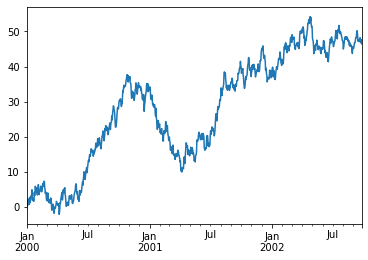

In [85]:
# 印出圖表
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()


輸入/輸出

In [87]:
# 讀取檔案/輸出檔案，支援 csv, h5, xlsx 檔案格式
df.to_csv('foo.csv')
pd.read_csv('foo.csv')
# df.to_excel('foo.xlsx', sheet_name='Sheet1')
# print(pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']))


,Unnamed: 0,A,B,C,D
0,0,0.216756,1.972481,0.890232,-0.793600
1,1,-0.927521,0.561487,0.220607,0.683453
2,2,0.068011,1.516239,0.116570,-0.428335
3,3,1.125374,-0.004607,1.743232,-0.041050
4,4,0.112310,-1.368096,-0.306318,-0.803689
5,5,2.463907,0.087962,0.597603,1.371971
6,6,0.003451,1.259377,0.722004,0.028018
7,7,1.237242,-0.533133,0.974503,-1.261970
